<a href="https://colab.research.google.com/github/krispatell/AER850-Project-1-Kris-Patel/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

### 2.1 Step 1: Data Processing

# Read the CSV file
df = pd.read_csv("Project 1 Data.csv")
print("Data successfully loaded\n")
print(df.head())




Data successfully loaded

       X       Y     Z  Step
0  9.375  3.0625  0.50     1
1  9.375  3.0625  0.51     1
2  9.375  3.0625  0.52     1
3  9.375  3.0625  0.53     1
4  9.375  3.0625  0.54     1



Overall Dataset Summary:
                X           Y           Z        Step
count  860.000000  860.000000  860.000000  860.000000
mean     5.587116    4.845605    1.197465    7.756977
std      3.719067    1.142329    0.522844    2.407837
min      0.000000    3.062500    0.000000    1.000000
25%      1.562500    3.062500    0.783800    7.000000
50%      7.770000    5.125000    1.220000    8.000000
75%      8.575000    5.845000    1.616975    9.000000
max      9.375000    5.845000    2.350000   13.000000

Summary by Step:
          X                               Y                           Z  \
       mean       std    min    max    mean  std     min     max   mean   
Step                                                                      
1     9.375  0.000000  9.375  9.375  3.0625  0.0  3.0625  3.0625  0.615   
2     9.375  0.000000  9.375  9.375  3.0625  0.0  3.0625  3.0625  0.855   
3     9.375  0.000000  9.375  9.375  3.0625  0.0  3.0625  3.0625  1.095   
4     9.375  0.00000

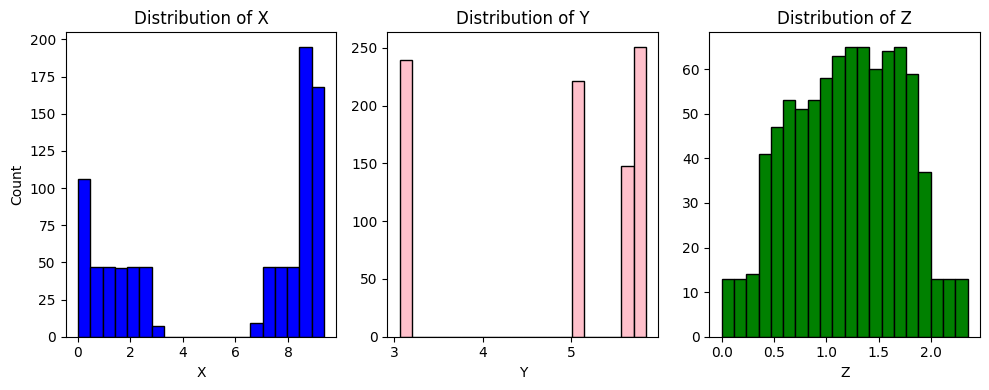

In [10]:
### 2.2 Step 2: Data Visualization

import numpy as np
import matplotlib.pyplot as plt

# 'describe()' gives stats (mean, std, min, max, quartiles) for X, Y, Z overall
print("\nOverall Dataset Summary:")
print(df.describe())

# Group by "Step" to compare X, Y, Z stats across classes
print("\nSummary by Step:")
print(df.groupby("Step")[["X", "Y", "Z"]].agg(["mean", "std", "min", "max"]))

# Plot histograms of X, Y, Z to observe distribution and clustering
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.hist(df["X"], bins=20, color='blue', edgecolor='black')
plt.title("Distribution of X")
plt.xlabel("X")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
plt.hist(df["Y"], bins=20, color='pink', edgecolor='black')
plt.title("Distribution of Y")
plt.xlabel("Y")

plt.subplot(1, 3, 3)
plt.hist(df["Z"], bins=20, color='green', edgecolor='black')
plt.title("Distribution of Z")
plt.xlabel("Z")

plt.tight_layout()
plt.show()


Correlation Matrix:
             X         Y         Z      Step
X     1.000000 -0.140759  0.013870 -0.749911
Y    -0.140759  1.000000 -0.133676  0.292810
Z     0.013870 -0.133676  1.000000  0.199531
Step -0.749911  0.292810  0.199531  1.000000


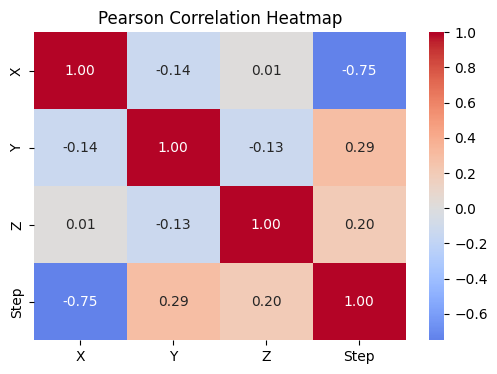

In [11]:
### 2.3 Step 3: Correlation Analysis:

import seaborn as sns

# Compute numeric feature correlatins
corr_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:")
print(corr_matrix)

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()


In [12]:
### 2.4 Step 4: Classification Model Development / Engineering

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# X are the featurs (input variables) and y is the target (class label)
X = df[["X", "Y", "Z"]]
y = df["Step"]

# Use 80/20 split and keep class balance using stratify=y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"[Split] train={X_train.shape}, test={X_test.shape}")


# Logistic Regression: simple, interpretable, best for linear relationships
lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# try a few regularization strengths (C controls how much penalty is applied)
lr_grid = {"logisticregression__C": [0.1, 1, 10]}

# Perform grid search with 5-fold cross-validation
lr_search = GridSearchCV(lr, lr_grid, cv=5, n_jobs=-1)
lr_search.fit(X_train, y_train)

# KNN is a distance-based algorithm and scaling is important.
knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Tune the number of neighbours and weight function
knn_grid = {
    "kneighborsclassifier__n_neighbors": [3, 5, 7, 9],
    "kneighborsclassifier__weights": ["uniform", "distance"]
}
knn_search = GridSearchCV(knn, knn_grid, cv=5, n_jobs=-1)
knn_search.fit(X_train, y_train)

# SVC finds class boundaries and RBF kernel handles non-linear patterns
svc = make_pipeline(StandardScaler(), SVC())

# Tune C (margin) and gamma (kernel spread)
svc_grid = {
    "svc__C": [0.1, 1, 10],
    "svc__gamma": ["scale", "auto"]
}
svc_search = GridSearchCV(svc, svc_grid, cv=5, n_jobs=-1)
svc_search.fit(X_train, y_train)

# Random Forest is ensemble of trees which handles complex patterns without scaling
rf = RandomForestClassifier(random_state=42)

# Define parameter ranges for randomized search
rf_dist = {
    "n_estimators": [200, 400, 800],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# RandomizedSearchCV samples combinations randomly instead of checking all of them
rf_search = RandomizedSearchCV(
    rf, rf_dist, n_iter=20, cv=5, n_jobs=-1, random_state=42
)
rf_search.fit(X_train, y_train)

# Check how each model performs on the unseen test data
models = {
    "LogReg": lr_search.best_estimator_,
    "KNN": knn_search.best_estimator_,
    "SVC": svc_search.best_estimator_,
    "RF(rand)": rf_search.best_estimator_,
}

print("\n[Test accuracy]")
for name, mdl in models.items():
    acc = accuracy_score(y_test, mdl.predict(X_test))
    print(f"{name}: {acc:.4f}")

# Print the best hyperparameters found for each model
print("\n[Best parameters]")
print("LogReg:", lr_search.best_params_)
print("KNN   :", knn_search.best_params_)
print("SVC   :", svc_search.best_params_)
print("RF    :", rf_search.best_params_)


[Split] train=(688, 3), test=(172, 3)

[Test accuracy]
LogReg: 1.0000
KNN: 0.9884
SVC: 1.0000
RF(rand): 0.9942

[Best parameters]
LogReg: {'logisticregression__C': 10}
KNN   : {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'distance'}
SVC   : {'svc__C': 10, 'svc__gamma': 'scale'}
RF    : {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}



=== Test Metrics (Accuracy, Precision_macro, F1_macro) ===
            LogReg | acc=1.0000  prec=1.0000  f1=1.0000
               KNN | acc=0.9884  prec=0.9744  f1=0.9665
               SVC | acc=1.0000  prec=1.0000  f1=1.0000
          RF(rand) | acc=0.9942  prec=0.9872  f1=0.9820

[Selected best model by F1_macro] -> LogReg


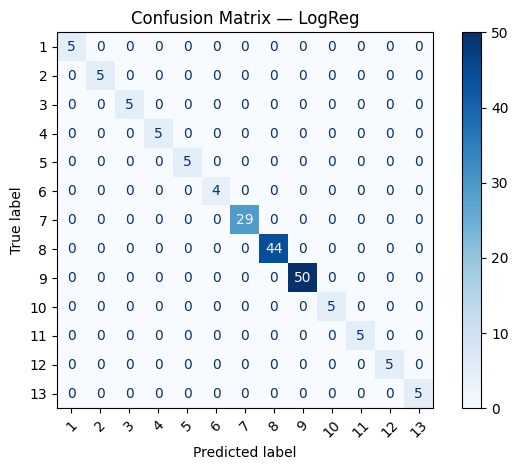

In [13]:
### 2.5 Model Performance Analysis

from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Helpes evaluate one model on the test set
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)
    return {"model": name, "accuracy": acc, "precision_macro": prec, "f1_macro": f1, "y_pred": y_pred}

# Evaluate all trained models from Step 2.4
results = []
for name, mdl in models.items():
    results.append(evaluate_model(name, mdl, X_test, y_test))

# Print a simple table of metrics
print("\n=== Test Metrics (Accuracy, Precision_macro, F1_macro) ===")
for r in results:
    print(f"{r['model']:>18} | acc={r['accuracy']:.4f}  prec={r['precision_macro']:.4f}  f1={r['f1_macro']:.4f}")

# Choose the best model by macro-F1 (good for multi-class and class imbalance)
best = max(results, key=lambda r: r["f1_macro"])
best_name = best["model"]
best_model = models[best_name]
print(f"\n[Selected best model by F1_macro] -> {best_name}")

# Confusion Matrix for the selected model
labels = np.unique(y_test)  # consistent label order
cm = confusion_matrix(y_test, best["y_pred"], labels=labels)

#plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", values_format="d")
plt.title(f"Confusion Matrix — {best_name}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




=== Stacking (SVC + RF) — Test Metrics ===
Accuracy:        1.0000
Precision_macro: 1.0000
F1_macro:        1.0000


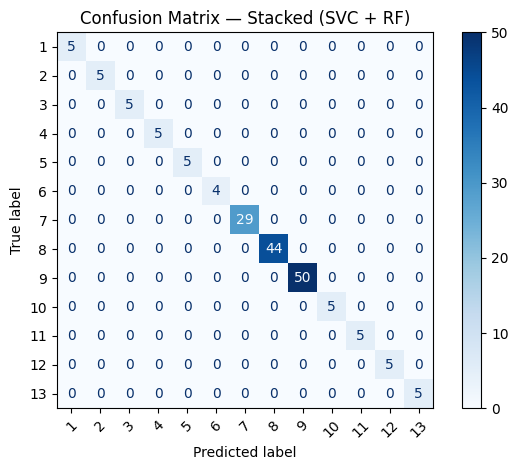


=== Comparison: Stacked vs Best Single (by F1_macro from 2.5) ===
Best single [LogReg] -> acc=1.0000, prec=1.0000, f1=1.0000
Stacked (SVC+RF)          -> acc=1.0000, prec=1.0000, f1=1.0000


In [14]:
# 2.6 Stacked Model Performance Analysis

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Use best SVC and RF models; Logistic Regression acts as meta-learner
stack = StackingClassifier(
    estimators=[
        ("svc", svc_search.best_estimator_),  # already a pipeline with StandardScaler + SVC
        ("rf",  rf_search.best_estimator_),   # RandomForest (no scaling needed)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=False,   # keep it simple: meta-learner only sees base model outputs
    n_jobs=-1
)

# Fit the stacking model on the training set
stack.fit(X_train, y_train)


# 2) Evaluate the stack
y_pred_stack = stack.predict(X_test)
acc_stack  = accuracy_score(y_test, y_pred_stack)
prec_stack = precision_score(y_test, y_pred_stack, average="macro", zero_division=0)
f1_stack   = f1_score(y_test, y_pred_stack, average="macro", zero_division=0)

print("\n=== Stacking (SVC + RF) — Test Metrics ===")
print(f"Accuracy:        {acc_stack:.4f}")
print(f"Precision_macro: {prec_stack:.4f}")
print(f"F1_macro:        {f1_stack:.4f}")


# 3) Confusion matrix for the stack
labels = np.unique(y_test)
cm_stack = confusion_matrix(y_test, y_pred_stack, labels=labels)

ConfusionMatrixDisplay(confusion_matrix=cm_stack, display_labels=labels).plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix — Stacked (SVC + RF)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Compare stacked model vs best single model (selected by macro-F1 from 2.5)
y_pred_best_single = best_model.predict(X_test)
acc_single  = accuracy_score(y_test, y_pred_best_single)
prec_single = precision_score(y_test, y_pred_best_single, average="macro", zero_division=0)
f1_single   = f1_score(y_test, y_pred_best_single, average="macro", zero_division=0)

print("\n=== Comparison: Stacked vs Best Single (by F1_macro from 2.5) ===")
print(f"Best single [{best_name}] -> acc={acc_single:.4f}, prec={prec_single:.4f}, f1={f1_single:.4f}")
print(f"Stacked (SVC+RF)          -> acc={acc_stack:.4f}, prec={prec_stack:.4f}, f1={f1_stack:.4f}")


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
### 2.7 Model Evaluation

import pandas as pd
import numpy as np
import joblib

# Load Dataset
try:
    df
except NameError:
    # Adjust the path if your CSV sits elsewhere
    df = pd.read_csv("Project 1 Data.csv")
    print("Loaded dataset from 'Project 1 Data.csv'")

# Select a trained model if available; otherwise train a simple LR+Scaler baseline
final_model = None

if "stack" in globals():                # stacked model from 2.6
    final_model = stack
    print("Using existing model: stack")
elif "best_model" in globals():          # best single model from 2.5
    final_model = best_model
    print("Using existing model: best_model")
else:
    # Fallback train Logistic Regression pipeline on full data
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LogisticRegression

    X_full = df[["X", "Y", "Z"]]
    y_full = df["Step"]

    final_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
    final_model.fit(X_full, y_full)
    print("Trained fallback model: LogisticRegression + StandardScaler (on full data)")


# Save the model and reload it
model_path = "final_model.joblib"  # save in working directory
joblib.dump(final_model, model_path)
print(f"Model saved to: {os.path.abspath(model_path)}")

loaded_model = joblib.load(model_path)
print("Model reloaded successfully.")


# Predict mainntenance steps for the 5 required coordinates
new_points = pd.DataFrame([
    [9.375, 3.0625, 1.51],
    [6.995, 5.125 , 0.3875],
    [0.    , 3.0625, 1.93],
    [9.4  , 3.0   , 1.8 ],
    [9.4  , 3.0   , 1.3 ]
], columns=["X", "Y", "Z"])

preds = loaded_model.predict(new_points)

out = new_points.copy()
out["Predicted_Step"] = preds
print("\nPredicted maintenance steps for the given coordinates:")
print(out.to_string(index=False))
out.to_csv("step7_predictions.csv", index=False)


Using existing model: stack
Model saved to: /content/final_model.joblib
Model reloaded successfully.

Predicted maintenance steps for the given coordinates:
    X      Y      Z  Predicted_Step
9.375 3.0625 1.5100               5
6.995 5.1250 0.3875               8
0.000 3.0625 1.9300              13
9.400 3.0000 1.8000               6
9.400 3.0000 1.3000               4
